**Hotel Booking project — Exploratory Data Analysis**
Conducting EDA using Python. Visualization made by Tableau.
Ethan Duong 

Outline:

1.   Dataset and its context.
2.   Import packages & read data.
3.   Data Preparation
*   Handle missing values base on the context
*   Convert columns values to make sense
*   Changing datatypes for further analysis
*   Handle duplicates base on assumption
*   Create new columns by combining other columns
*   Drop unnecessary columns

4. Descriptive Statistics & Correlations

Detail visualization link: https://medium.com/@ethan.duong1120/hotel-booking-project-exploratory-data-analysis-48bcfb7ae7cd

We will import these packages and libraries to analyze and visualize data:



In [22]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


Make sure all columns are displayed while we use head function

In [23]:
pd.options.display.max_columns = None


In [24]:
#Now we can read the dataset
df = pd.read_csv('hotel_bookings.csv')

In [25]:
df.head(125)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Resort Hotel,0,30,2015,July,27,4,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,C,0,No Deposit,8.0,NaN,0,Contract,79.5,0,0,Check-Out,2015-07-05
121,Resort Hotel,1,51,2015,July,27,4,0,1,1,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,105.0,0,0,Canceled,2015-05-29
122,Resort Hotel,1,36,2015,July,27,4,0,1,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,G,1,No Deposit,250.0,NaN,0,Transient,123.0,0,0,No-Show,2015-07-04
123,Resort Hotel,1,73,2015,July,27,4,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,73.8,0,2,Canceled,2015-05-13


In [26]:
len(df.index) #check len

119390

In [27]:
df.columns #check columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# 3. Data Preparation

Handle missing values

In [28]:
for i in df.columns:
  if df[i].isna().sum() != 0:
    print('null values in', i, 'column :', df[i].isna().sum() ) 

null values in children column : 4
null values in country column : 488
null values in agent column : 16340
null values in company column : 112593


So we have 4 columns with null values. We need to understand the context of the data to make a decision on how to handle these null values. Here is how I handled it:

In [29]:
df = df.drop(columns = 'company')
df = df.dropna(subset = ['children'])
df['country'].fillna(df['country'].mode()[0], inplace = True)
df['agent'].fillna(0, inplace = True)


**Convert columns values**

In [30]:
df['distribution_channel'].replace("TA/TO", "Undefined", inplace = True)
df['meal'].replace(['Undefined', 'BB', 'FB', 'HB', 'SC'], 
                   [ 'No Meal', 'Breakfast', 'Full Board', 'Hald Board', 'No Meal'],
                   inplace = True)

**Changing datatypes**

In [31]:
df['children'].astype(int)
df['agent'].astype(int)
pd.to_datetime(df['reservation_status_date'])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

**Handle duplicates**

In [32]:
df.duplicated().sum()

32020

In [33]:
df.drop_duplicates(inplace = True)

**Create new columns by combining other columns**

In [34]:
df['total_night'] = df['stays_in_weekend_nights'] + df['stays_in_weekend_nights']

In [35]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_night
count,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.00000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000
mean,0.274935,79.915207,2016.210345,26.839285,15.815786,1.005460,2.625816,1.875936,0.138681,0.010828,0.039088,0.030424,0.184053,0.271685,81.01464,0.749823,106.350448,0.084255,0.698613,2.010920
std,0.446484,86.056865,0.686082,13.673468,8.834781,1.031981,2.053702,0.626475,0.455942,0.113616,0.193806,0.369208,1.732188,0.727349,109.94285,10.017441,55.002761,0.281577,0.831952,2.063962
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,72.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,98.100000,0.000000,0.000000,2.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.00000,0.000000,134.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,391.000000,5400.000000,8.000000,5.000000,38.000000


In [36]:
##convert month name to number then create new arrival date column by combining year month date
df['arrival_date_month'] = pd.to_datetime(df['arrival_date_month'] , format='%B').dt.month


In [37]:
df['arrival_date'] = pd.to_datetime(dict(year=df.arrival_date_year, month=df.arrival_date_month, day=df.arrival_date_day_of_month))


**Drop unnecessary columns**

In [38]:
columns_to_drop = ['stays_in_weekend_nights','stays_in_week_nights', 'booking_changes','deposit_type','adr','arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number']
df.drop(columns = columns_to_drop, inplace = True)

In [39]:
df.head(20)

,hotel,is_canceled,lead_time,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night,arrival_date
0,Resort Hotel,0,342,2,0.0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,0.0,0,Transient,0,0,Check-Out,2015-07-01,0,2015-07-01
1,Resort Hotel,0,737,2,0.0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,0.0,0,Transient,0,0,Check-Out,2015-07-01,0,2015-07-01
2,Resort Hotel,0,7,1,0.0,0,Breakfast,GBR,Direct,Direct,0,0,0,A,C,0.0,0,Transient,0,0,Check-Out,2015-07-02,0,2015-07-01
3,Resort Hotel,0,13,1,0.0,0,Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,304.0,0,Transient,0,0,Check-Out,2015-07-02,0,2015-07-01
4,Resort Hotel,0,14,2,0.0,0,Breakfast,GBR,Online TA,Undefined,0,0,0,A,A,240.0,0,Transient,0,1,Check-Out,2015-07-03,0,2015-07-01
6,Resort Hotel,0,0,2,0.0,0,Breakfast,PRT,Direct,Direct,0,0,0,C,C,0.0,0,Transient,0,0,Check-Out,2015-07-03,0,2015-07-01
7,Resort Hotel,0,9,2,0.0,0,Full Board,PRT,Direct,Direct,0,0,0,C,C,303.0,0,Transient,0,1,Check-Out,2015-07-03,0,2015-07-01
8,Resort Hotel,1,85,2,0.0,0,Breakfast,PRT,Online TA,Undefined,0,0,0,A,A,240.0,0,Transient,0,1,Canceled,2015-05-06,0,2015-07-01
9,Resort Hotel,1,75,2,0.0,0,Hald Board,PRT,Offline TA/TO,Undefined,0,0,0,D,D,15.0,0,Transient,0,0,Canceled,2015-04-22,0,2015-07-01
10,Resort Hotel,1,23,2,0.0,0,Breakfast,PRT,Online TA,Undefined,0,0,0,E,E,240.0,0,Transient,0,0,Canceled,2015-06-23,0,2015-07-01


After data preparation process, we can export the file to csv, then import to Tableau for visualization later:


In [40]:
df.to_csv('result.csv', index=False)

In [41]:
corr_matrix = round(df.corr(),3)
corr_matrix

,is_canceled,lead_time,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_night
is_canceled,1.000,0.185,0.082,0.067,-0.021,-0.090,0.051,-0.052,-0.001,0.004,-0.184,-0.121,0.060
lead_time,0.185,1.000,0.140,0.029,-0.004,-0.147,0.005,-0.079,0.080,0.132,-0.087,0.034,0.235
adults,0.082,0.140,1.000,0.024,0.017,-0.172,-0.042,-0.121,0.030,-0.016,0.008,0.113,0.088
children,0.067,0.029,0.024,1.000,0.017,-0.046,-0.019,-0.029,0.042,-0.020,0.036,0.045,0.029
babies,-0.021,-0.004,0.017,0.017,1.000,-0.013,-0.005,-0.009,0.029,-0.007,0.031,0.095,0.014
is_repeated_guest,-0.090,-0.147,-0.172,-0.046,-0.013,1.000,0.206,0.441,-0.065,-0.013,0.072,-0.001,-0.107
previous_cancellations,0.051,0.005,-0.042,-0.019,-0.005,0.206,1.000,0.392,-0.033,0.004,-0.003,0.002,-0.021
previous_bookings_not_canceled,-0.052,-0.079,-0.121,-0.029,-0.009,0.441,0.392,1.000,-0.058,-0.006,0.041,0.027,-0.057
agent,-0.001,0.080,0.030,0.042,0.029,-0.065,-0.033,-0.058,1.000,-0.015,0.122,0.033,0.158
days_in_waiting_list,0.004,0.132,-0.016,-0.020,-0.007,-0.013,0.004,-0.006,-0.015,1.000,-0.016,-0.050,-0.032


# 4 **Correlation heatmap**
Type of plot that visualize the strength of relationships between numerical variables. Here how I build it:

Text(0.03, 0.98, 'Correlation Between Variables')

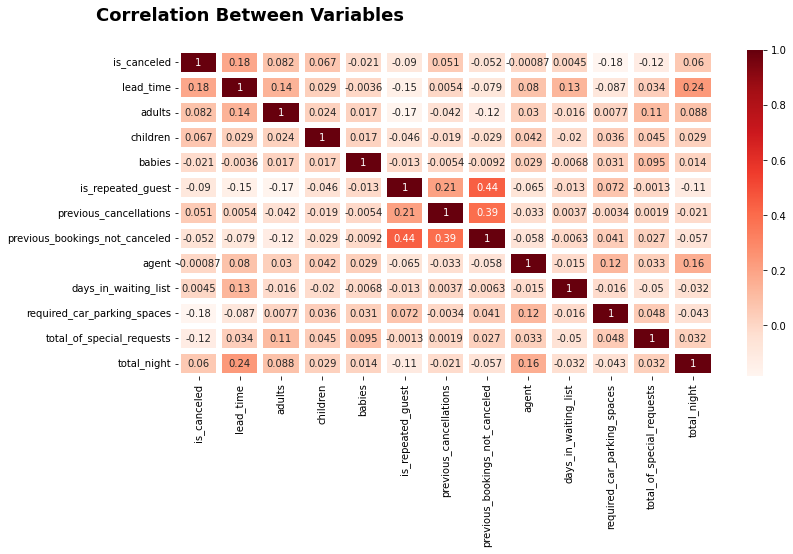

In [42]:
plt.rcParams['figure.figsize'] =(12, 6)
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=5)
plt.suptitle('Correlation Between Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha = "left", fontsize='18', fontfamily='sans-serif', 
             color= "black")